In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [21]:
path = r'E:/Data Sets'
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
df1 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df = df[df['DATE'].astype(str).str.contains('199')]
df1 = df1[df1['DATE'].astype(str).str.contains('199')]
df.drop(columns=['DATE', 'MONTH'],inplace=True)
df1.drop(columns=['DATE'],inplace=True)
list1 = [text.split('_', 1)[0].replace('.', '').upper() for text in df.columns.to_list()]
list1 = list(set(list1))
list2 = [text.split('_', 1)[0].replace('.', '').upper() for text in df1.columns.to_list()]
list2 = list(set(list2))
main_list = list(set(list1) - set(list2))
list3 = []
for i in df.columns.to_list():
    if (i.split('_', 1)[0].replace('.', '').upper() == 'ROMA' or i.split('_', 1)[0].replace('.', '').upper() == 'TOURS' or i.split('_', 1)[0].replace('.', '').upper() == 'GDANSK'):
        list3.append(i)

df.drop(columns = list3, inplace = True)

In [22]:
df.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7


In [23]:
scaler = StandardScaler()
features_to_scale = df.columns
df_scaled = scaler.fit_transform(df[features_to_scale])

In [24]:
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(df_scaled)

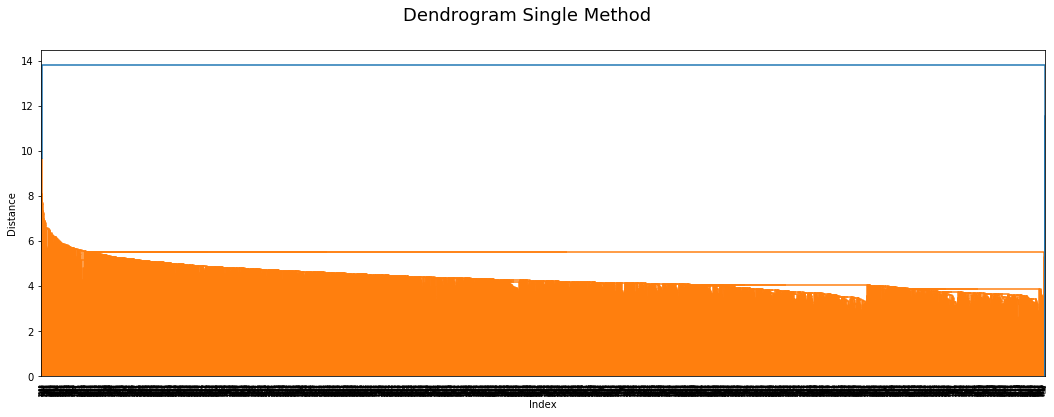

In [25]:
distance_single = linkage(principalComponents, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

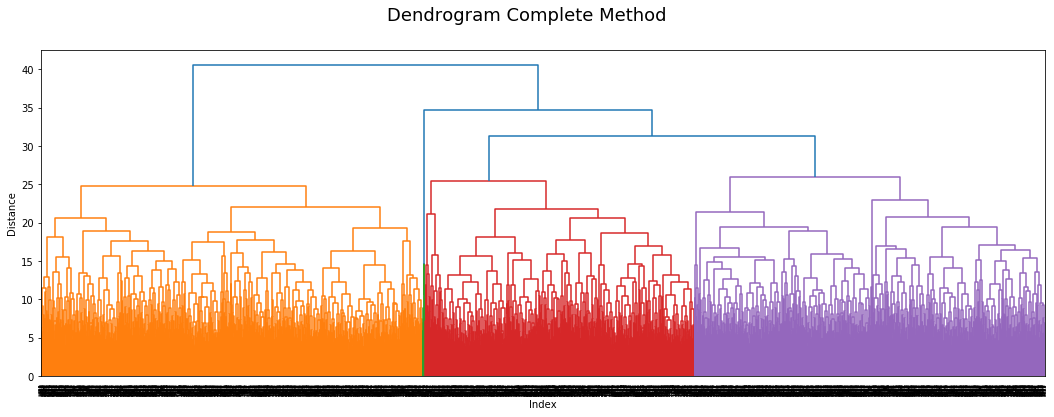

In [26]:
distance_complete = linkage(principalComponents, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

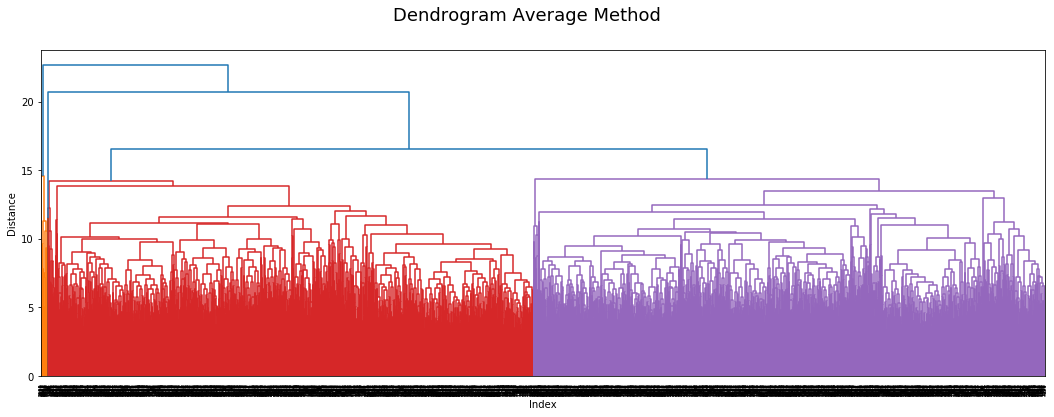

In [27]:
distance_avg = linkage(principalComponents, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_avg, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

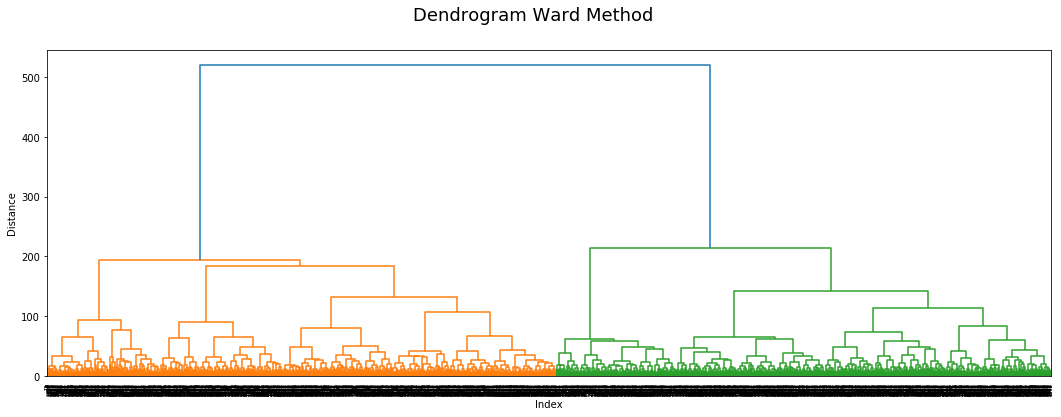

In [28]:
distance_ward = linkage(principalComponents, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()